#### About

> Ensemble methods

Ensemble methods in machine learning involve combining the predictions of multiple models to create a more accurate and robust predictive model. There are several types of ensemble methods, including bagging, boosting, and stacking. 





In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for simplicity
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Create a base decision tree classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Create the base estimator
base_estimator = DecisionTreeClassifier()


In [6]:
# Create the BaggingClassifier
bagging_model = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, random_state=42)



In [7]:
# Fit the model to the training data
bagging_model.fit(X_train, y_train)


/home/suraj/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

In [8]:
# Predict on the testing data
y_pred = bagging_model.predict(X_test)


In [9]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7


Plotting the decision boundary of the bagging model along with the decision boundary of the base model to see how bagging improves the model's performance.

In [10]:
# Plot the decision boundary of the base model
base_model = DecisionTreeClassifier()
base_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
# Create a meshgrid of points for plotting
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


In [12]:
# Predict the classes for all points in the meshgrid using the base model
zz_base = base_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)



In [13]:
# Predict the classes for all points in the meshgrid using the bagging model
zz_bagging = bagging_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)


Text(0, 0.5, 'Feature 2')

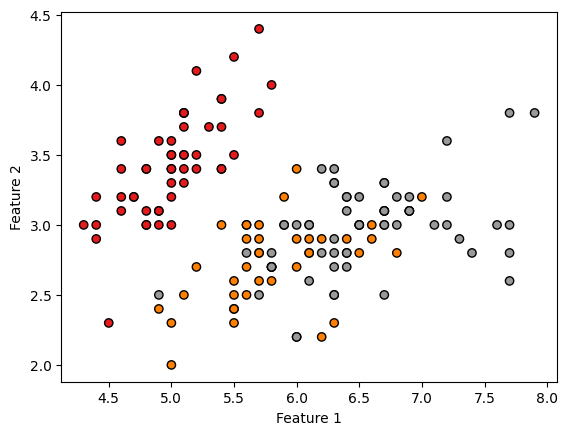

In [14]:
# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


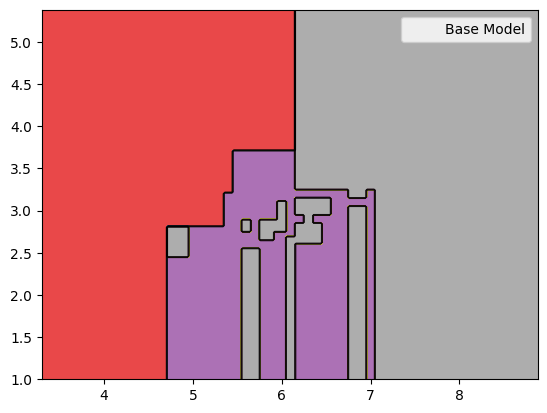

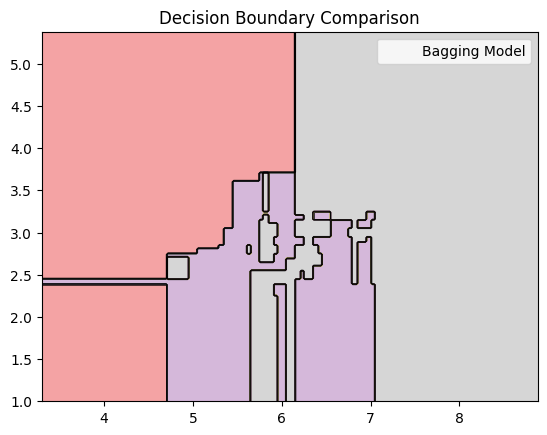

In [16]:
# Plot the decision boundary of the base model
plt.contourf(xx, yy, zz_base, alpha=0.8, cmap=plt.cm.Set1)
plt.contour(xx, yy, zz_base, colors='k', linewidths=0.5)
plt.legend(['Base Model'])

plt.show()
# Plot the decision boundary of the bagging model
plt.contourf(xx, yy, zz_bagging, alpha=0.4, cmap=plt.cm.Set1)
plt.contour(xx, yy, zz_bagging, colors='k', linewidths=0.5)
plt.legend(['Bagging Model'])

plt.title('Decision Boundary Comparison')
plt.show()